# Visualisation graphique : Seaborn

## Un 1er jeu de données

In [1]:
import pandas as pd
data = pd.read_csv('Data/Demographic-Data.csv')
data.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


## Introduction à Seaborn

*Seaborn* est un package très puissant construit à partir de matplotlib et qui permet de visualiser les informations de différentes manières.

Pour voir les différentes visualisations possibles, regrader la page https://seaborn.pydata.org/examples/index.html ou chercher *galerie Seaborn* sur internet

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogrammes = distribution

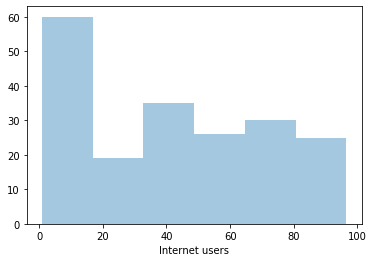

In [4]:
vis1 = sns.distplot(data['Internet users'], kde=False)

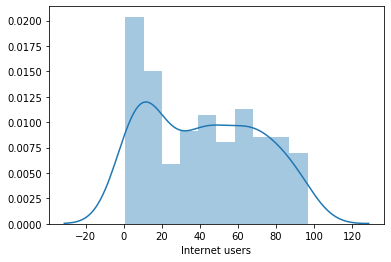

In [5]:
vis1 = sns.distplot(data['Internet users'], bins=10)

## Boxplots

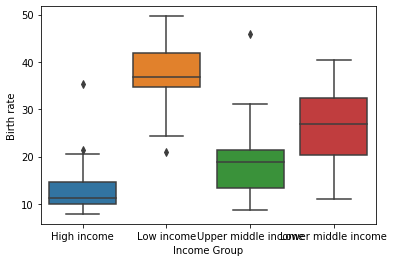

In [6]:
vis2 = sns.boxplot(data=data, x='Income Group', y='Birth rate')

## Stripplot

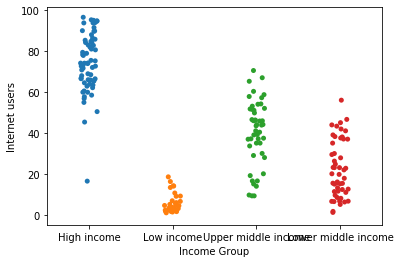

In [7]:
# équivalent du scatter plot pour des variables catégories
vis3 = sns.stripplot(x='Income Group', y='Internet users', data = data)

## Combinaison de graphes dans une figure

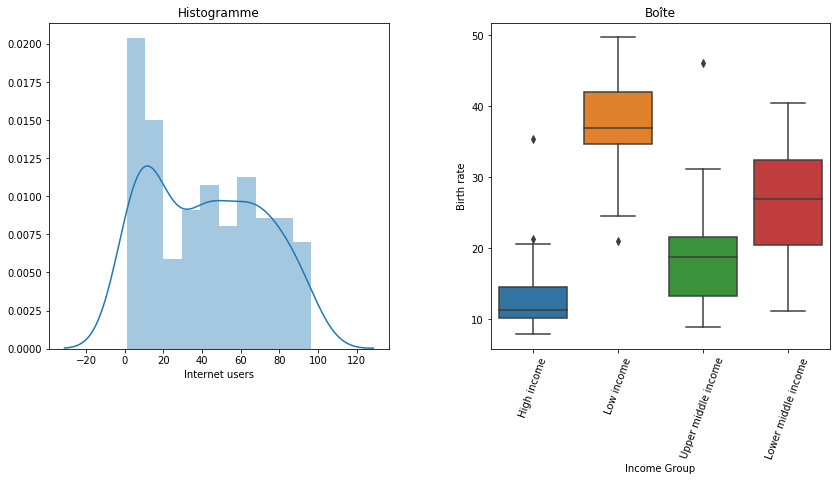

In [10]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
fig.subplots_adjust(wspace = 0.3)

ax1 = sns.distplot(data['Internet users'], bins=10, ax = axes[0])
ax1.set_title('Histogramme')

ax2 = sns.boxplot(data=data, x='Income Group', y='Birth rate', ax = axes[1])
ax2.set_title('Boîte')

plt.xticks(rotation=70)
plt.show()

## Modèles linéaires

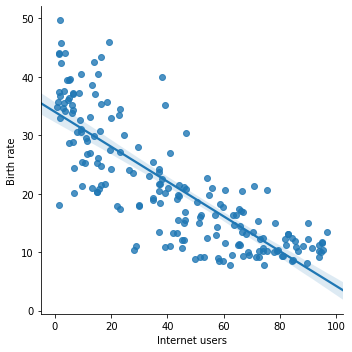

In [11]:
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate')

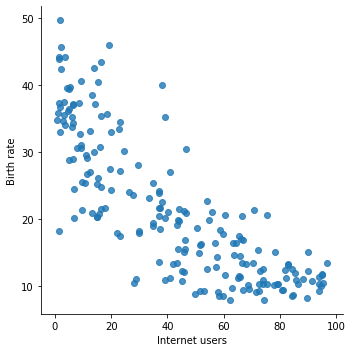

In [12]:
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate',fit_reg=False)

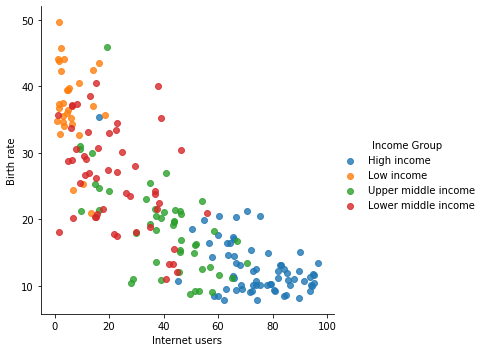

In [20]:
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate', fit_reg = False, hue='Income Group')

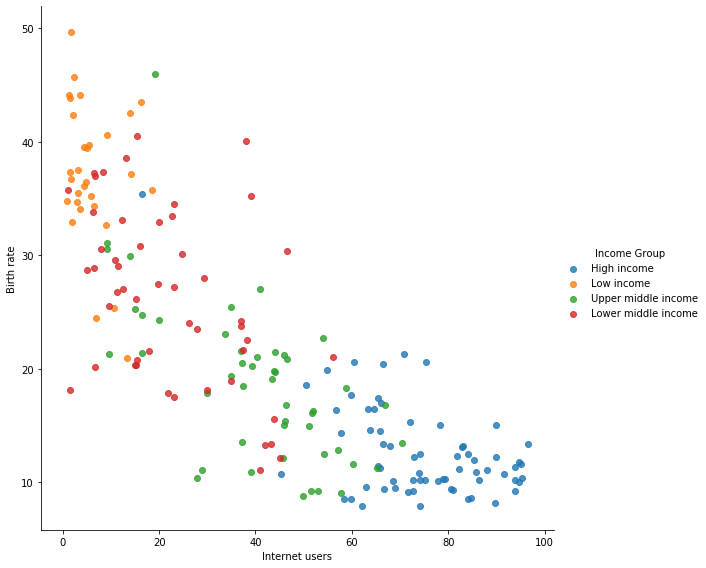

In [14]:
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate', fit_reg = False, hue='Income Group', height = 8)

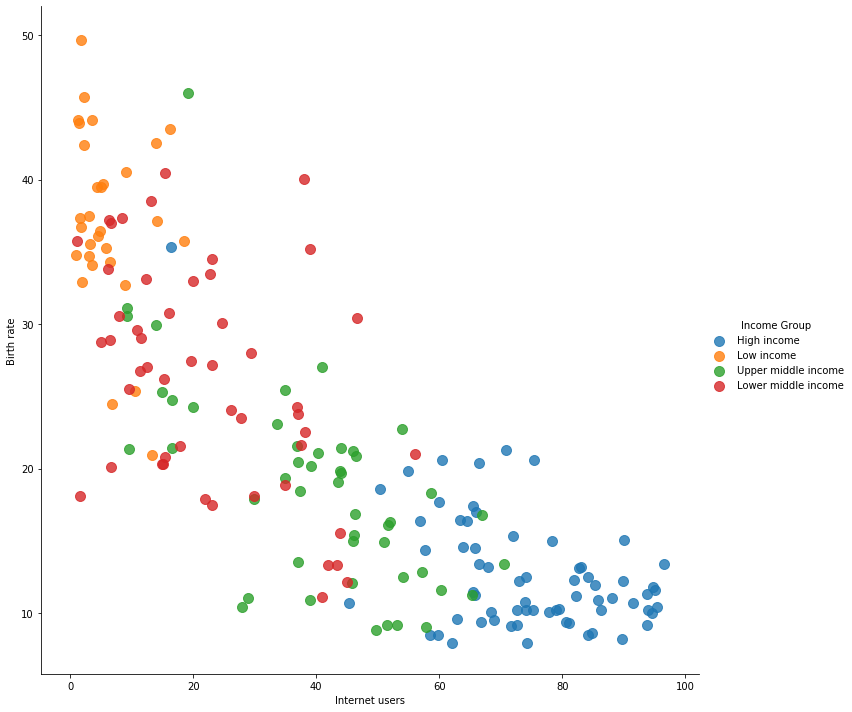

In [17]:
# on peut ajouter des options d'affichage de matplotlib, il faut utiliser les dictionnaires {scatter,lines}_kws
# (kws = key words arguments)
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate',
                  fit_reg = False,
                  hue='Income Group',
                  height = 10,
                  scatter_kws ={'s':100})

---
---

## Nouveau jeu de données

In [21]:
movies = pd.read_csv('Data/Movie-Ratings.csv')
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [22]:
# on peut changer le nom de colonnes par des noms plus faciles à utiliser
# (moins longs, sans espaces ni caractère spéciaux)
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings', 'Budget', 'Year']
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
Budget             559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [24]:
movies.describe()

,CriticRatings,AudienceRatings,Budget,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


### Type de données Category

In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
Budget             559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [26]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
Budget             559 non-null int64
Year               559 non-null category
dtypes: category(2), int64(3), object(1)
memory usage: 19.2+ KB


In [28]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [29]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [30]:
movies.Genre.describe()

count        559
unique         7
top       Comedy
freq         172
Name: Genre, dtype: object

In [31]:
movies.describe()

,CriticRatings,AudienceRatings,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---
---

## JointPlots

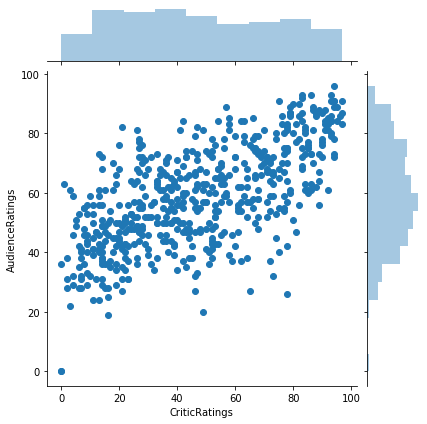

In [32]:
vis4 = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings')

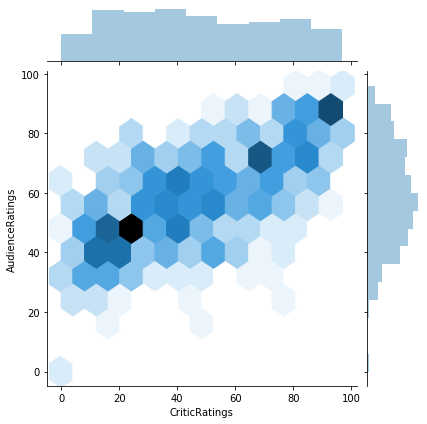

In [33]:
vis4 = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings', kind = 'hex')

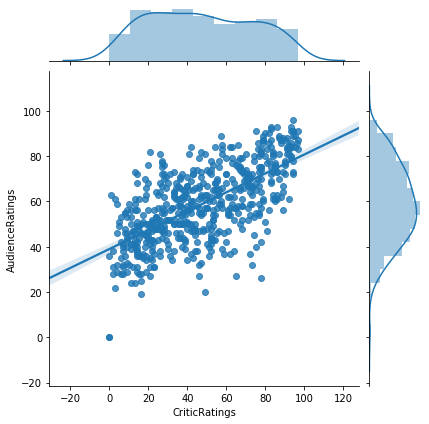

In [34]:
vis4 = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings', kind = 'reg')

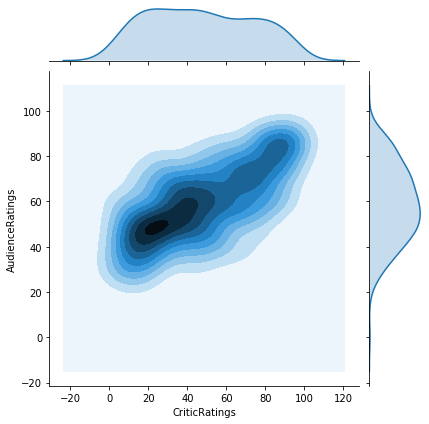

In [35]:
vis4 = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings', kind = 'kde')

## Histogrammes empilés

Les histogrammes empilés (*stacked histograms*) consistent à empiler chaque colonne l'une sur l'autre.

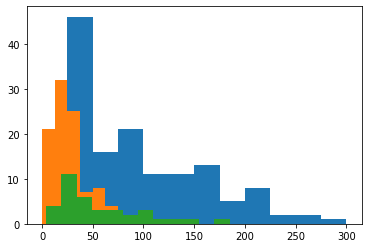

In [38]:
# on peut superposer des histogrammes, mais ce n'est pas exactement ce qu'on veut...
plt.hist(movies[movies.Genre=='Action'].Budget, bins=12)
plt.hist(movies[movies.Genre=='Drama'].Budget, bins=12)
plt.hist(movies[movies.Genre=='Thriller'].Budget, bins=12)
plt.show()

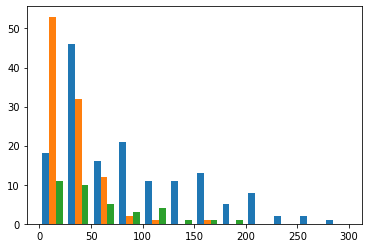

In [39]:
# on peut mettre côte à côte sur un même graphique des histogrammes, mais ce n'est toujours pas ce qu'on veut...
plt.hist([movies[movies.Genre=='Action'].Budget,
          movies[movies.Genre=='Drama'].Budget,
          movies[movies.Genre=='Thriller'].Budget],
         bins=12)
plt.show()

In [44]:
movies
movies[['Film','Genre']]
movies.Film

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: object

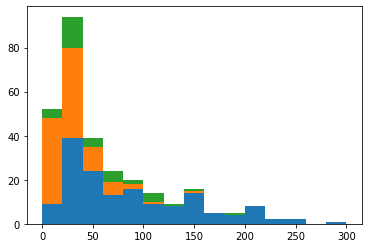

In [40]:
# une solution : l'option stacked
plt.hist([movies[movies.Genre=='Action'].Budget,
          movies[movies.Genre=='Drama'].Budget,
          movies[movies.Genre=='Thriller'].Budget],
         bins=15,
        stacked = True)
plt.show()

### Petit exercice  

Construire un histogramme empilé avec tous les genres présents dans le jeu de données.

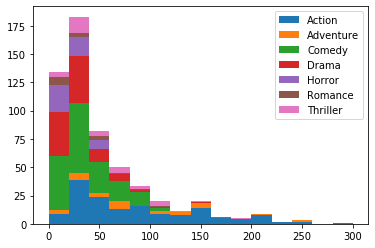

In [50]:
l=list()
labels=list()

for genre in movies.Genre.cat.categories:
    l.append(movies[movies.Genre==genre].Budget)
    labels.append(genre)

plt.hist(l, stacked = True, bins=15, label=labels)
plt.legend()
plt.show()

## Kernel Density Estimates (KDE) plot

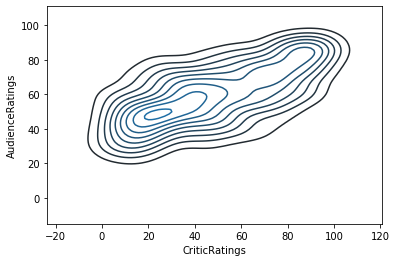

In [51]:
vis5 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings)

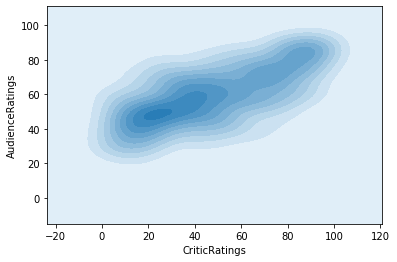

In [52]:
vis5 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade = True)

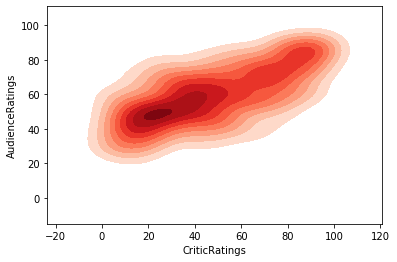

In [53]:
vis5 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Reds')

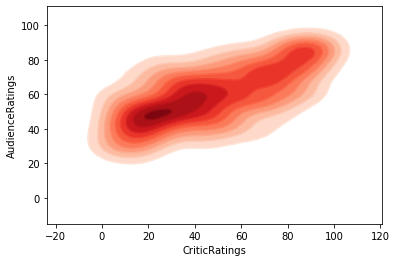

In [55]:
vis5 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   cmap='Reds')
vis5b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Reds')

## Diagrammes en violon

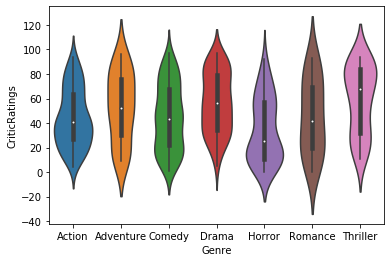

In [56]:
vis6 = sns.violinplot(data=movies, x='Genre', y='CriticRatings')

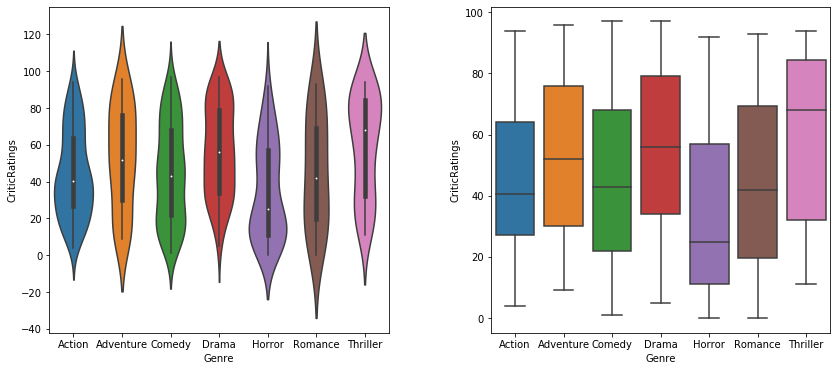

In [57]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
fig.subplots_adjust(wspace = 0.3)
ax1 = sns.violinplot(data=movies, x='Genre', y='CriticRatings', ax = axes[0])
ax2 = sns.boxplot(data=movies, x='Genre', y='CriticRatings', ax = axes[1])
plt.show()

### Exercice

- Filtrer les données uniquement pour le genre Drame
- Afficher une figure avec les 2 graphiques (violon et boîte à moustaches) pour les notes des critiques en fonction des années
- Comparer les deux types de graphiques pour voir leur intérêt

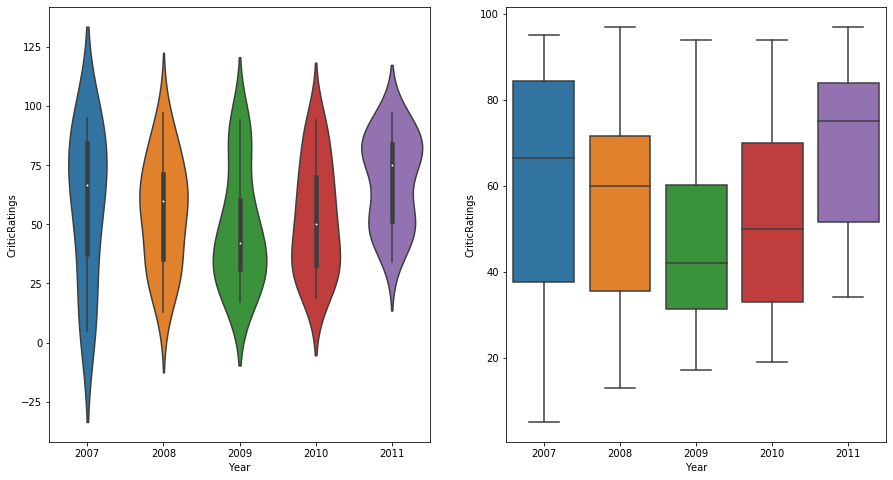

In [58]:
drame = movies[movies.Genre=='Drama']

fig, axes = plt.subplots(1,2,figsize=(15,8))
sns.violinplot(data=drame, x='Year', y='CriticRatings', ax = axes[0])
sns.boxplot(data=drame, x='Year', y='CriticRatings', ax = axes[1])

plt.show()

## Facet Grid

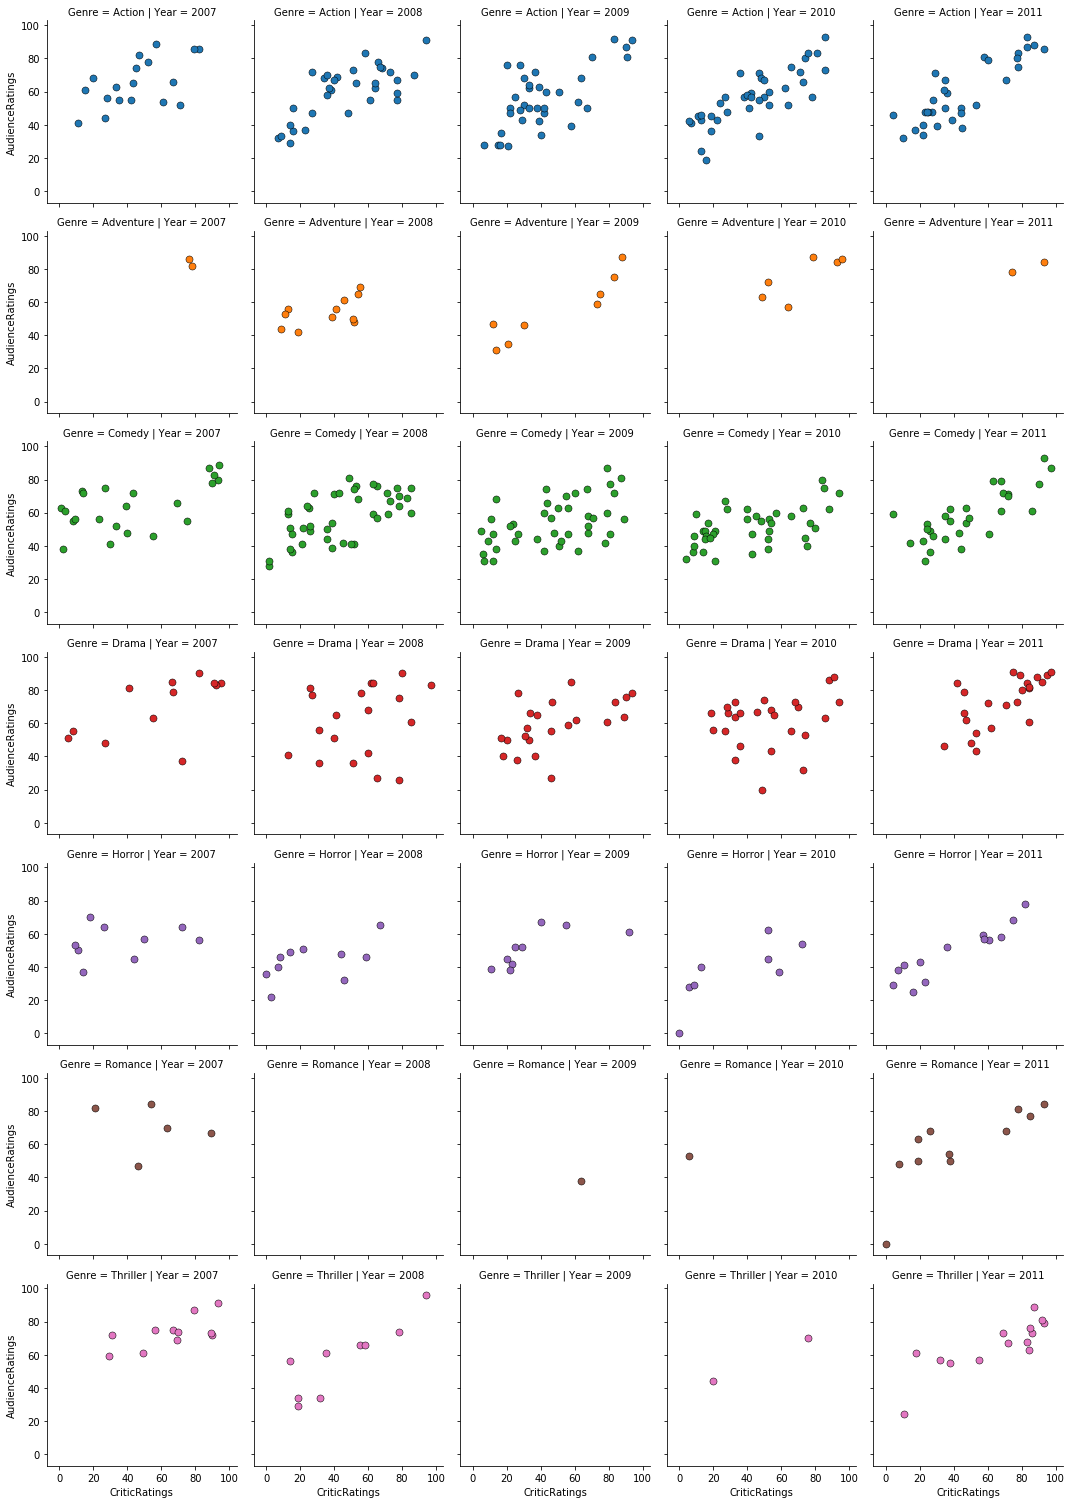

In [59]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = {'s':50, 'linewidth':0.5, 'edgecolor':'black'}
#kws = dict(s=50, linewidth=0.5, edgecolor='black')          
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)

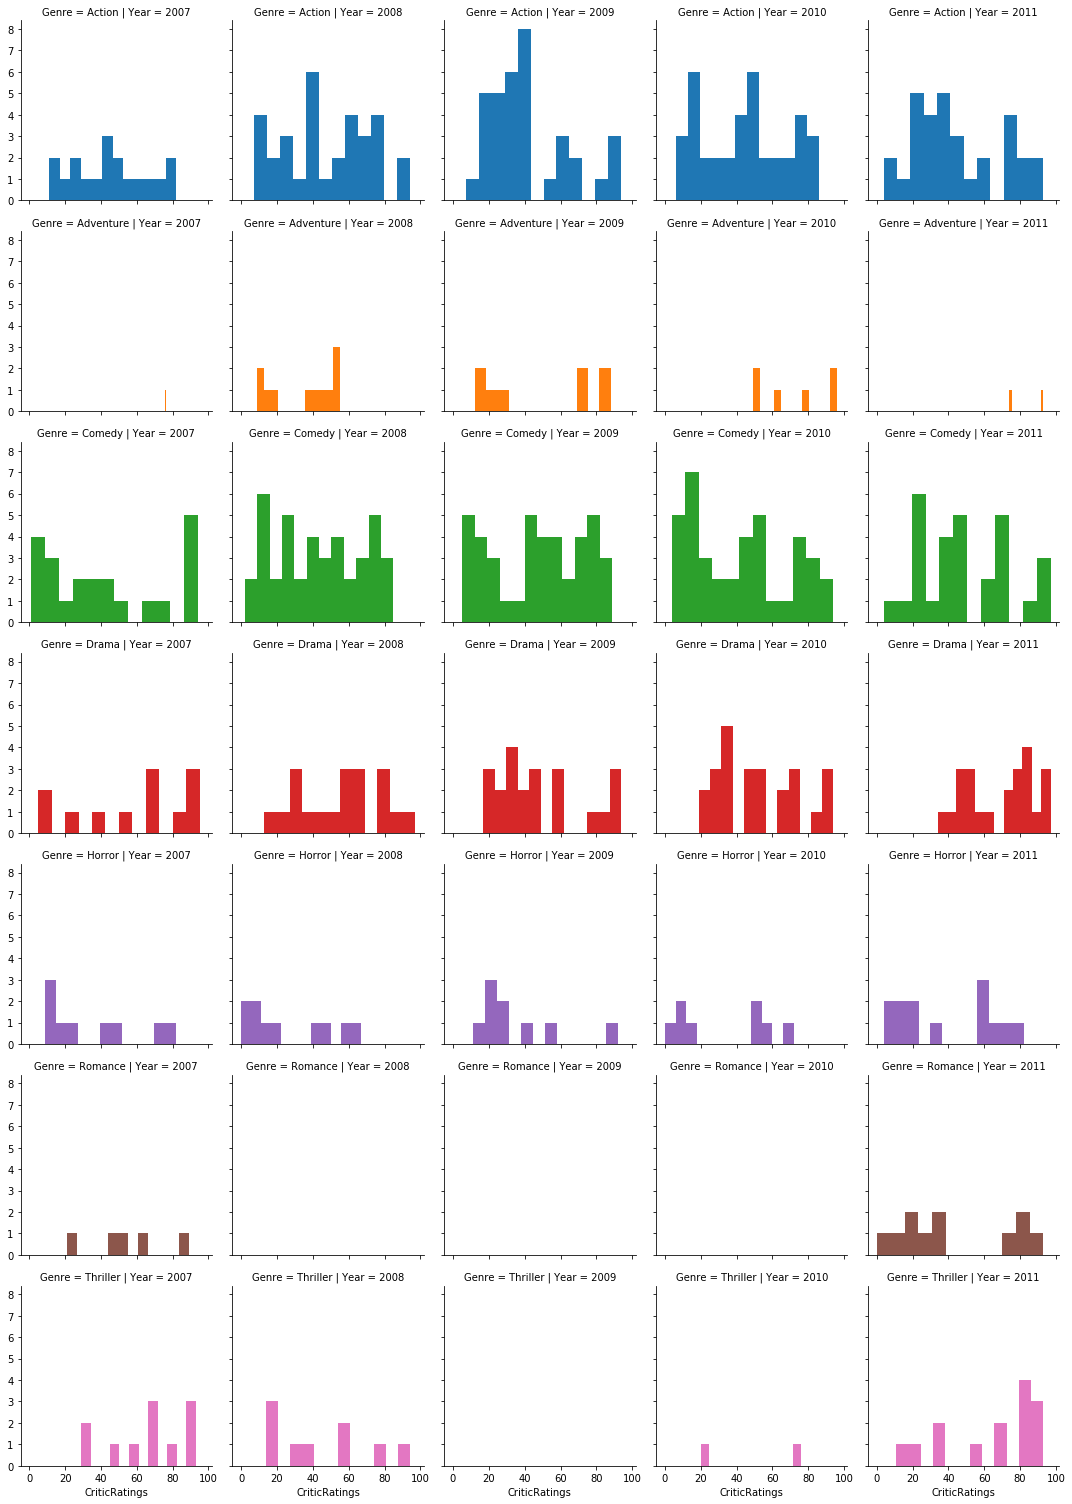

In [60]:
# on peut généraliser à tous les types de graphiques
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(bins=12)
g = g.map(plt.hist, 'CriticRatings', **kws)

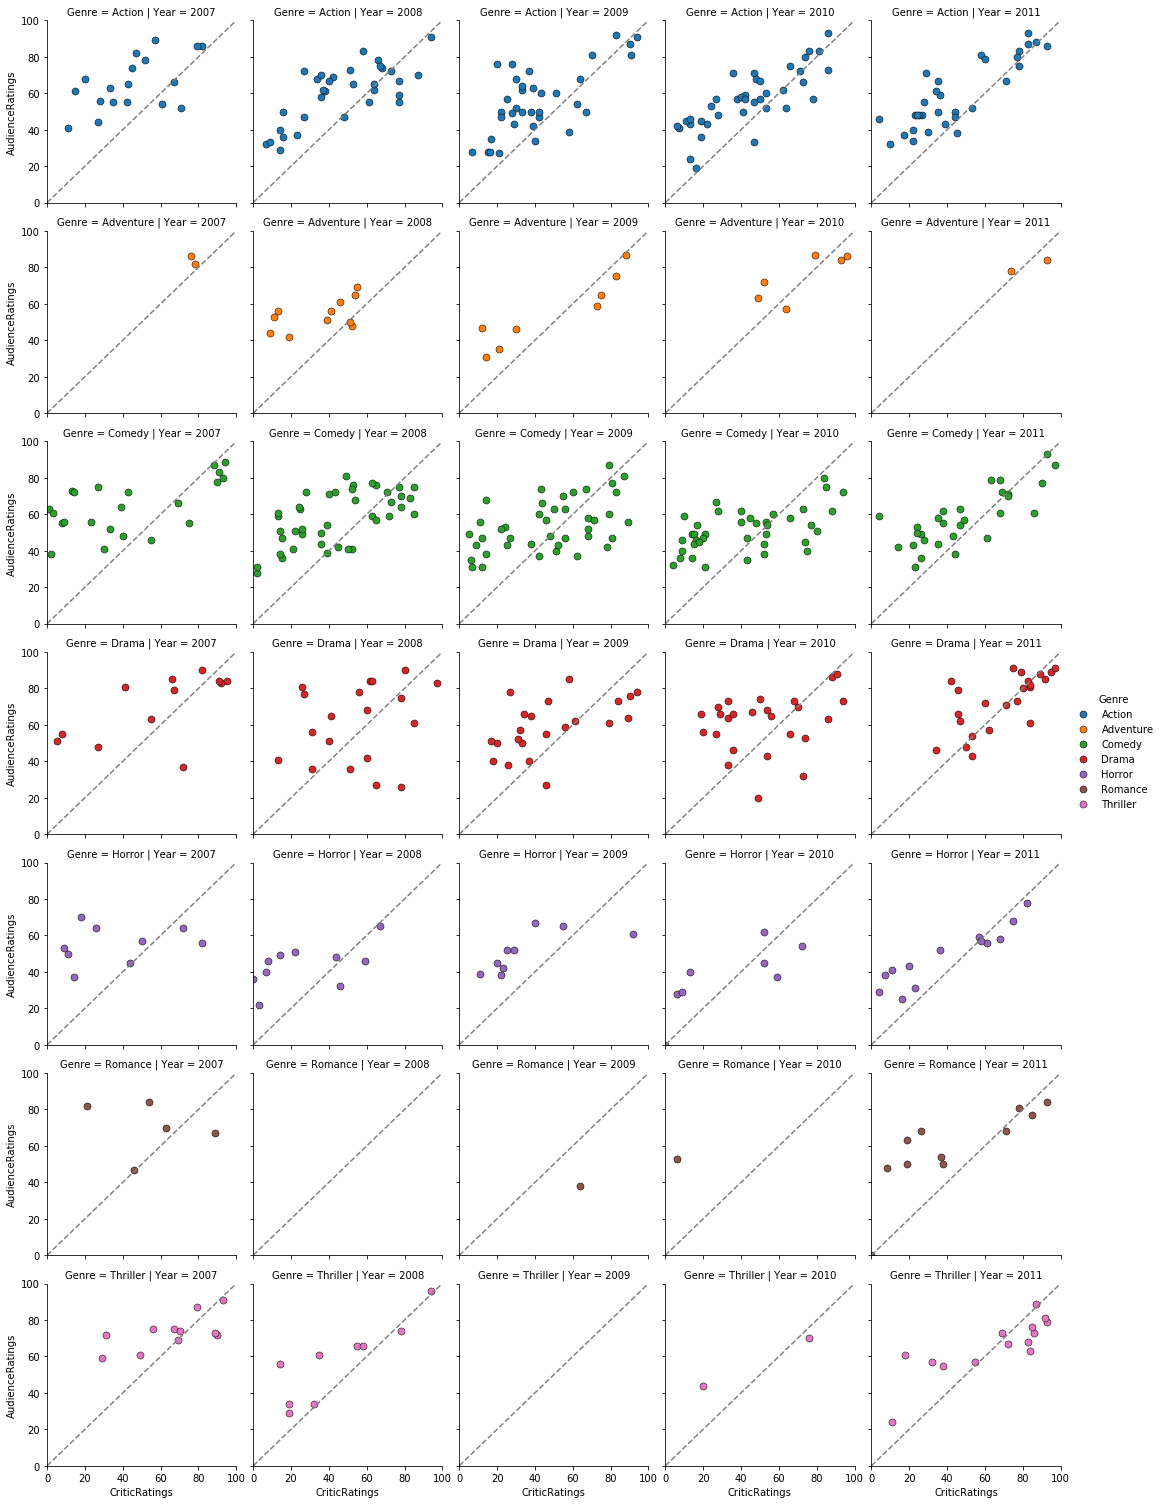

In [61]:
# on peut ajouter les diagonales par exemple et fixer les échelles des axes
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

kws = {'s':50, 'linewidth':0.5, 'edgecolor':'black'} #kws = dict(s=50, linewidth=0.5, edgecolor=black')

g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)

g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c='gray', ls='--')
    
g.add_legend()

## Une belle figure : un dashboard (tableau de bord)

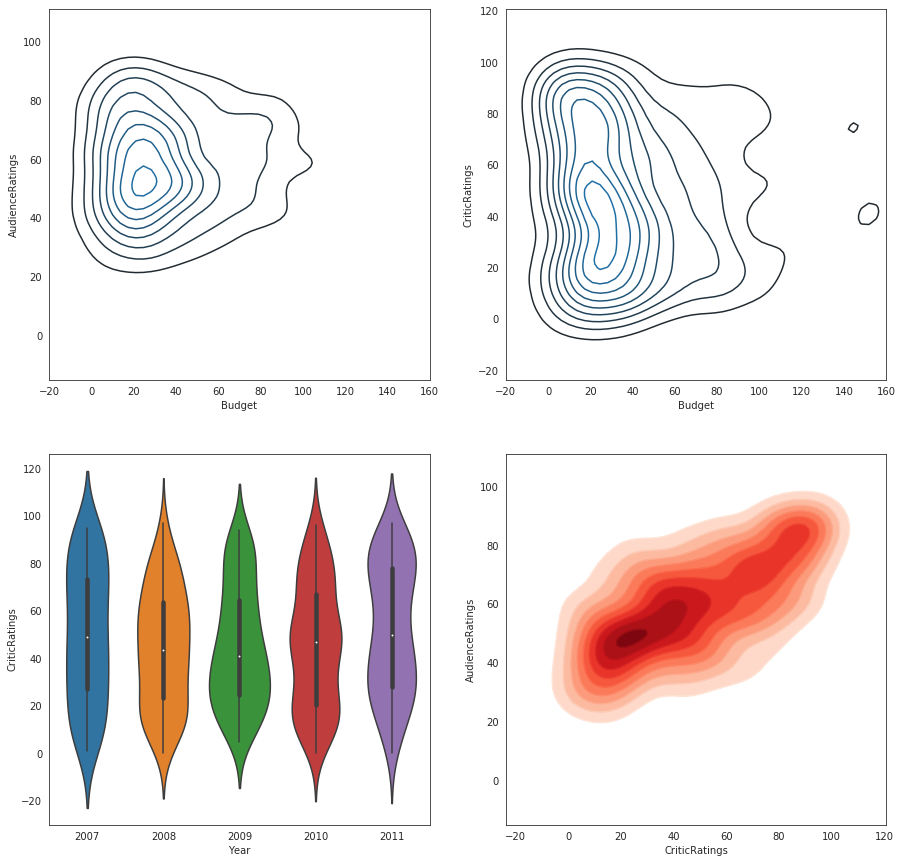

In [62]:
sns.set_style('white') #pour changer le fond, essayer avec 'darkgrid' par exemple pour voir la différence

f,axes = plt.subplots(2,2,figsize =(15,15))

# Axes 1
k1 = sns.kdeplot(movies.Budget, movies.AudienceRatings, ax = axes[0,0])

# Axes 2
k2 = sns.kdeplot(movies.Budget, movies.CriticRatings, ax = axes[0,1])

# Axes 3
v = sns.violinplot(data = movies, x ='Year', y='CriticRatings', ax = axes[1,0])

# Axes 4
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax= axes[1,1])
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Reds', ax= axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

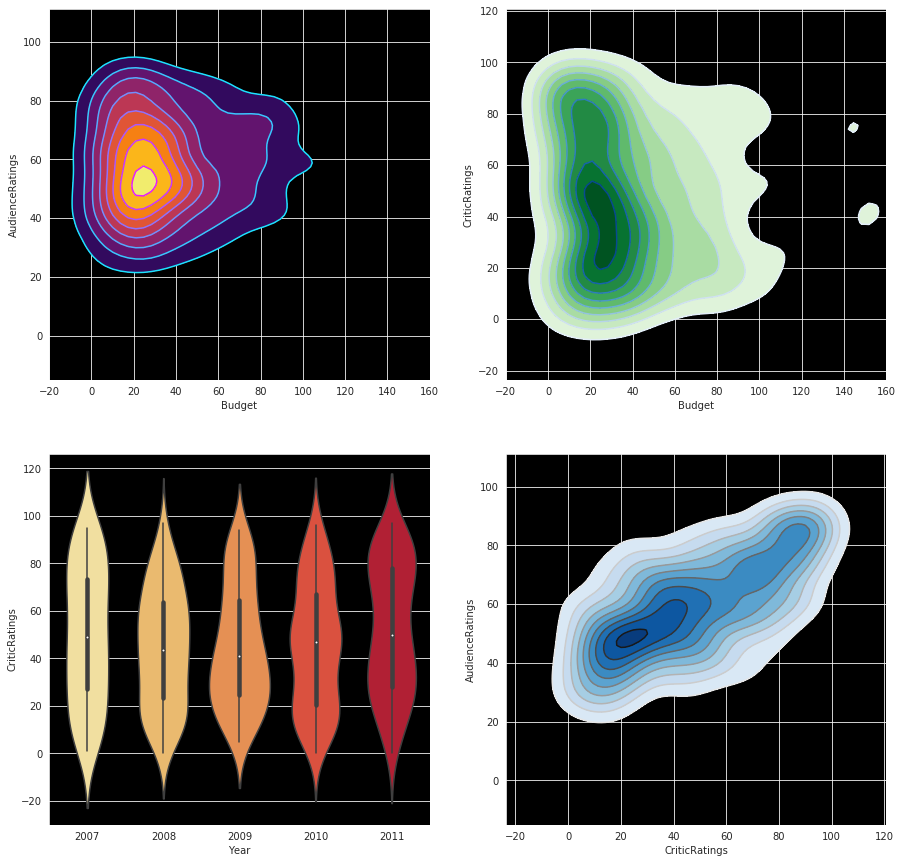

In [65]:
sns.set_style('darkgrid', {'axes.facecolor' : 'black'})

f,axes = plt.subplots(2,2,figsize =(15,15))

# Axes 1
k1 = sns.kdeplot(movies.Budget, movies.AudienceRatings, cmap='cool', ax = axes[0,0])
k1b = sns.kdeplot(movies.Budget, movies.AudienceRatings, 
                 shade = True, shade_lowest=False, cmap='inferno', ax = axes[0,0])

# Axes 2
k2 = sns.kdeplot(movies.Budget, movies.CriticRatings, cmap='Blues', ax = axes[0,1])
k2b = sns.kdeplot(movies.Budget, movies.CriticRatings, 
                 shade = True, shade_lowest=False, cmap='Greens', ax = axes[0,1])

# Axes 3
v = sns.violinplot(data = movies, x ='Year', y='CriticRatings', ax = axes[1,0],
                  palette = 'YlOrRd')

# Axes 4
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='gist_gray_r', ax= axes[1,1])
k3b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Blues', ax= axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

### Exercice

Créer votre propre dashboard avec 6 graphiques différents à partir des tous les exemples vus dans ce notebook.

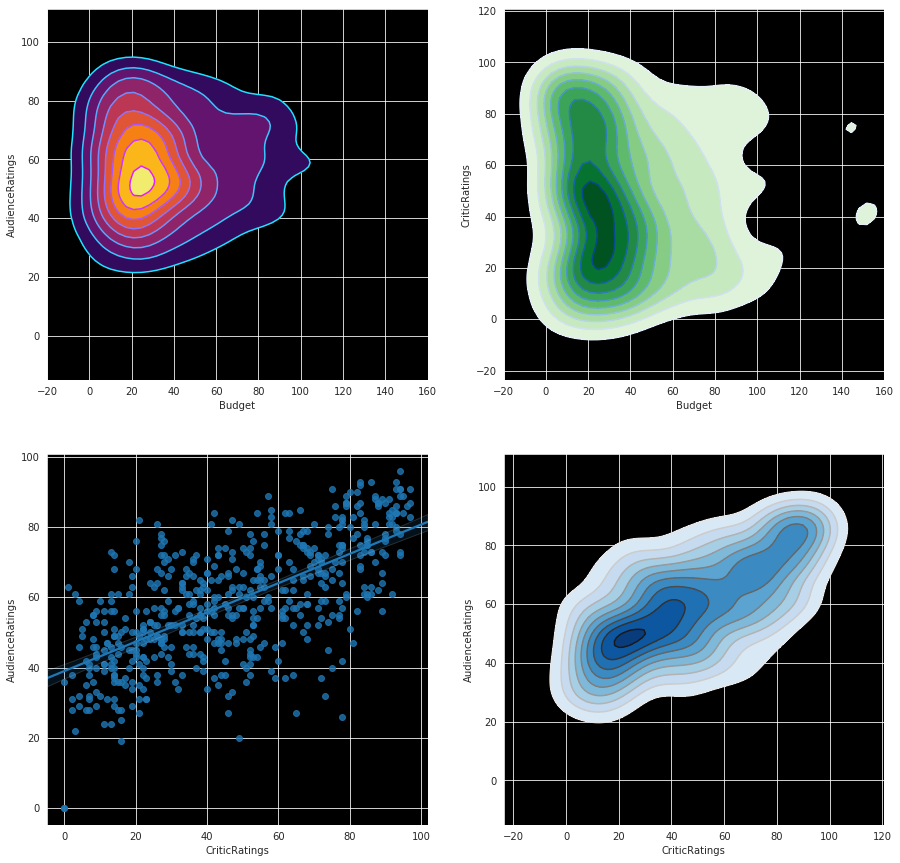

In [69]:
sns.set_style('darkgrid', {'axes.facecolor' : 'black'})

f,axes = plt.subplots(2,2,figsize =(15,15))

# Axes 1
k1 = sns.kdeplot(movies.Budget, movies.AudienceRatings, cmap='cool', ax = axes[0,0])
k1b = sns.kdeplot(movies.Budget, movies.AudienceRatings, 
                 shade = True, shade_lowest=False, cmap='inferno', ax = axes[0,0])

# Axes 2
k2 = sns.kdeplot(movies.Budget, movies.CriticRatings, cmap='Blues', ax = axes[0,1])
k2b = sns.kdeplot(movies.Budget, movies.CriticRatings, 
                 shade = True, shade_lowest=False, cmap='Greens', ax = axes[0,1])

# Axes 3
lm = sns.regplot(data=movies, x='CriticRatings', y='AudienceRatings',ax=axes[1,0])

# Axes 4
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='gist_gray_r', ax= axes[1,1])
k3b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Blues', ax= axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()